Enter Lower bound of Cropped Area: 2 2
Enter Upper bound of Cropped Area: 6 6
Enter Number of vertices in a Polygon: 3
Start entering Points:
Enter Coordinates of 1 Vertex:
1 5
Enter Coordinates of 2 Vertex:
2 7
Enter Coordinates of 3 Vertex:
3 5


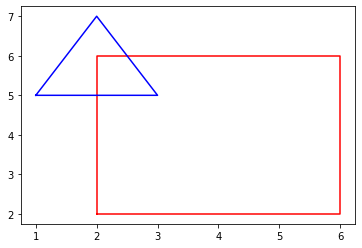

outside to outside
Outside to inside
Inside to outside
[(2, 7.0), (3, 5), (2, 5.0)]


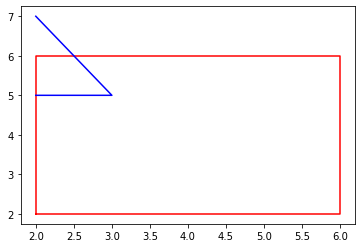

In [4]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

def draw_graph(xlist, ylist, V, title):
    plt.plot(xlist, ylist, c="red", label="Required Area")
    x = []
    y = []
    for i in V:
        x.append(i[0])
        y.append(i[1])
    plt.plot(x, y, c="blue", label="Polygon")
    plt.show()

def check_points(xmin, ymin, xmax, ymax, x1, y1):
    if (x1 >= xmin and x1 <= xmax):
        if (y1 >= ymin and y1 <= ymax):
            return True
        else:
            return False
    else:
        return False

def get_xy(xmin, ymin, xmax, ymax, x1, y1, x2, y2):
    m = (y2 - y1) / (x2 - x1)
    if (check_points(xmin, ymin, xmax, ymax, x1, y1)):
        A = x1
        B = y1
        C = x2
        D = y2
    else:
        A = x2
        B = y2
        C = x1
        D = y1
    if (C <= xmin):
        # left
        x = xmin
        y = B + (m * (xmin - A))
    elif (C >= xmax):
        # right
        x = xmax
        y = B + (m * (xmax - A))
    elif (D <= ymin):
        # bottom
        y = ymin
        x = ((ymin - B) / m) + A
    else:
        # top
        y = ymax
        x = ((ymax - B) / m) + A
    return (x, y)

def clip_using_sutherland_hodgman(x1, y1, x2, y2, V):
    check = []
    v1 = []
    for i in V:
        check.append(check_points(x1, y1, x2, y2, i[0], i[1]))

    for i in range(len(check) - 1):
        if (check[i] == False):
            if (check[i + 1] == True):
                print("Outside to inside")
                x, y = get_xy(x1, y1, x2, y2, V[i][0], V[i][1], V[i + 1][0], V[i + 1][1])
                v1.append((x, y))
            else:
                print("outside to outside")
        elif (check[i]):
            if (check[i + 1] == True):
                print("Inside to Inside")
                v1.append((V[i][0], V[i][1]))
            else:
                print("Inside to outside")
                v1.append((int(V[i][0]), int(V[i][1])))
                x, y = get_xy(x1, y1, x2, y2, V[i][0], V[i][1], V[i + 1][0], V[i + 1][1])
                v1.append((x, y))
    print(v1)
    return v1

x1, y1 = map(int, input("Enter Lower bound of Cropped Area: ").split())
x2, y2 = map(int, input("Enter Upper bound of Cropped Area: ").split())

xlist = [x1, x1, x2, x2, x1]
ylist = [y1, y2, y2, y1, y1]

count = int(input("Enter Number of vertices in a Polygon: "))
V = []
print("Start entering Points:")
for i in range(count):
    print("Enter Coordinates of", i + 1, "Vertex:")
    x, y = map(int, input().split())
    V.append((x, y))
V.append((V[0][0], V[0][1]))

draw_graph(xlist, ylist, V, "Actual Data is: ")
V1 = clip_using_sutherland_hodgman(x1, y1, x2, y2, V)
draw_graph(xlist, ylist, V1, "Cropped Data is: ")


In [3]:
pip install shapely


Note: you may need to restart the kernel to use updated packages.
